# TSP
### Jonáš Kříž
___
Uvod of the mohework

This notebook includes the report for the TSP homework. It contains calls to several configurations of Evolutinary strategies (ES) and local search (LS) algorithms. The calls are encompanied by several visualizations. Also an interactive interface is present, displaying results of benchmarks of said algorithms in plots.

## 1. Installation and setup

Install julia, activate the environment, run the notebook. If needed the steps are in more detail in the README.md

In [1]:
#"""Compile the library"""
using EO
using Plots

In [2]:
"""Problems"""

G1, v1   = EO.parse_TSP_problem("ALL_tsp/st70");
G2, v2   = EO.parse_TSP_problem("ALL_tsp/a280");
G3, v3   = EO.parse_TSP_problem("ALL_tsp/att48");
G4, v4   = EO.parse_TSP_problem("ALL_tsp/berlin52");
G5, v5   = EO.parse_TSP_problem("ALL_tsp/ulysses16");
G6, v6   = EO.parse_TSP_problem("ALL_tsp/ulysses22");
G7, v7   = EO.parse_TSP_problem("ALL_tsp/ch130");
G8, v8   = EO.parse_TSP_problem("ALL_tsp/eil76");
G9, v9   = EO.parse_TSP_problem("ALL_tsp/rat195");
G10, v10 = EO.parse_TSP_problem("ALL_tsp/pr76");

graphs      = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10];
vertices    = [v1, v2, v3, v4, v5, v6, v7, v8, v9, v10];
names       = ["st70", "a280", "att48", "berlin52", "ulysses16", "ulysses22", "ch130", "eil76", "rat195", "pr76"];

These are the problems that have been benchmarked.

## 2. Local Search




In [4]:
### run parameters setup

problem_i = 2

G = graphs[problem_i]
pop_size = 1
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(TSP_initialization, dimension, pop_size, objective_function)
selection           = EO.s_identity
crossover           = identity
mutation            = [enclose_arguments(EO.order_switch!, G), enclose_arguments(EO.pair_switch!, G), enclose_arguments(EO.weaklink_preturbation!, G)]
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 50000)    # maximal number of objective function calls
### run parameters setup

@time order_switch_ls = solvink_hart(objective_function, initialization, selection, crossover, mutation[1], replacement, termination)
@time pair_switch_ls  = solvink_hart(objective_function, initialization, selection, crossover, mutation[2], replacement, termination)
@time shuffle_ls      = solvink_hart(objective_function, initialization, selection, crossover, mutation[3], replacement, termination)

@show order_switch_ls.top_value
@show pair_switch_ls.top_value
@show shuffle_ls.top_value

EO.plot_results(order_switch_ls, vertices[problem_i])

  8.165389 seconds (2.59 M allocations: 29.605 GiB, 5.28% gc time, 1.88% compilation time)
  7.942407 seconds (2.98 M allocations: 29.549 GiB, 4.81% gc time, 1.66% compilation time)
  7.724446 seconds (2.52 M allocations: 29.528 GiB, 4.91% gc time, 1.43% compilation time)
order_switch_ls.top_value = 3820.7311267329414
pair_switch_ls.top_value = 8780.801549851565
shuffle_ls.top_value = 32724.911153115565


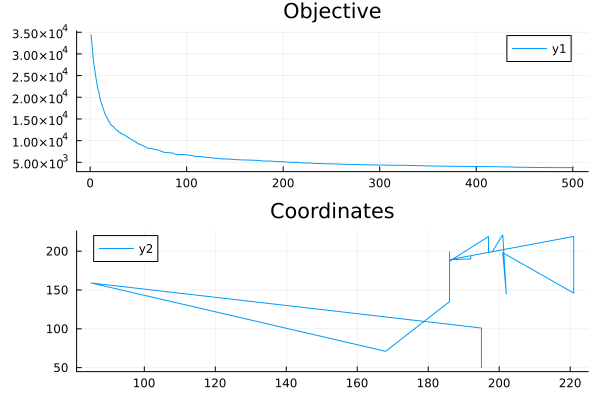

In [5]:
EO.plot_results(order_switch_ls)

Listed work:
* LS with pair switch mutation
* LS with subsequence reversal mutation
* LS with subsequence shuffle

## 3. Evolution strategy


In [3]:
### run parameters setup

problem_i = 2

G = graphs[problem_i]
pop_size = 100
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(TSP_initialization, dimension, pop_size, objective_function)
selection           = enclose_arguments(s_tournament, pop_size*3, round(Int, pop_size/3))
crossover           = [EO.cr_ordered, EO.cr_subtour, EO.cr_edge_recombination]
mutation            = enclose_arguments(EO.order_switch!, G)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 50000)
### run parameters setup

@time solution1 = solvink_hart(objective_function, initialization, selection, crossover[1], mutation, replacement, termination)
@time solution2 = solvink_hart(objective_function, initialization, selection, crossover[2], mutation, replacement, termination)
@time solution3 = solvink_hart(objective_function, initialization, selection, crossover[3], mutation, replacement, termination)


@show solution1.top_value
@show solution2.top_value
@show solution3.top_value

EO.plot_results(solution2, vertices[problem_i])


 14.140789 seconds (4.80 M allocations: 3.364 GiB, 4.91% gc time, 16.13% compilation time)
 91.035889 seconds (6.91 M allocations: 4.945 GiB, 0.41% gc time, 0.36% compilation time)
127.623268 seconds (380.96 M allocations: 199.754 GiB, 14.40% gc time, 0.51% compilation time)
solution1.top_value = 7744.249448555856
solution2.top_value = 5638.5113669758475
solution3.top_value = 8580.509803659252


In [5]:
EO.plot_results(solution2)

Listed work:
* ES with ordered crossover
* ES with subtour order exchange crossover
* ES with edge recombination crossover

## 4. Constructive heuristic

The initial solution is not a random sequence of vertices, but a sequence found by the nearest neighbor heuristic. The nearest neighbor heuristic constructs the sequence by always following a vertex by the closest vertex which is not yet included in the route.

Both ES and LS do not improve the initial solution much. That is because of the probabilitic nature of the mutations and crossovers which has a very low chance of randomly improving already relatively good solution. Also it forces the algorithm to start in a local optimum which is hard to get out of when the whole population is there.

solution.top_value = 691.8680258739563


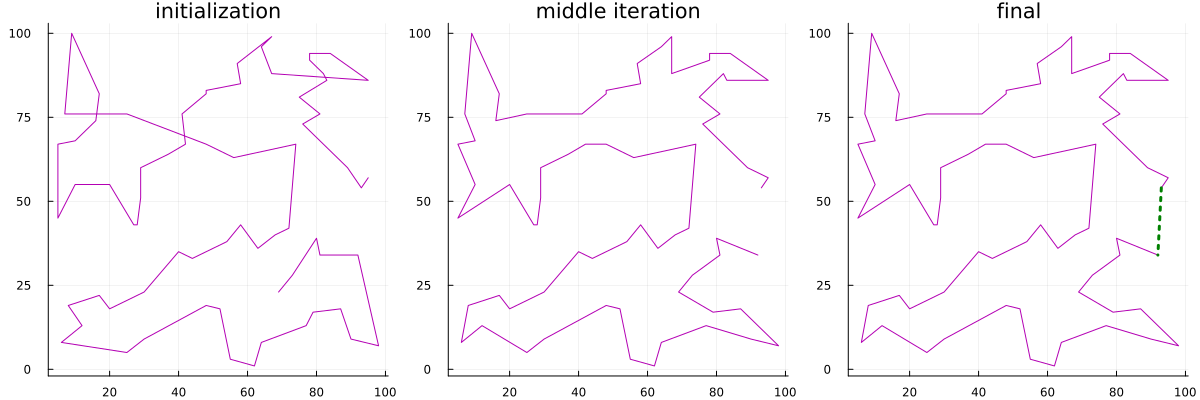

In [8]:
problem_i = 1

G = graphs[problem_i]
pop_size = 100
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(EO.TSP_NN_initialization, dimension, 33, objective_function, G)# NN search is expensive, the population is initialized smaller and growns in the next generation
selection           = enclose_arguments(s_tournament, pop_size*3, round(Int, pop_size/3))
crossover           = EO.cr_subtour
mutation            = enclose_arguments(EO.order_switch!, G)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 100000)
### run parameters setup

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution, vertices[problem_i])

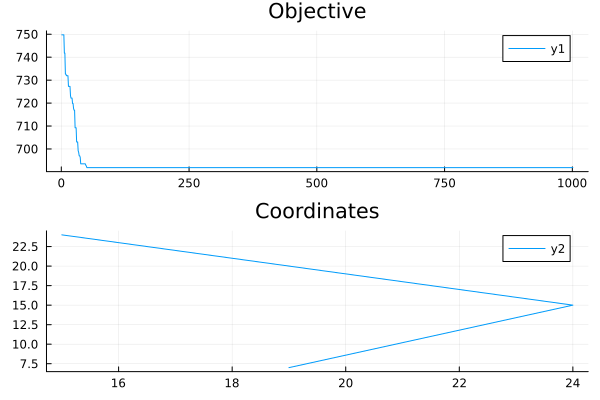

In [9]:
EO.plot_results(solution)

solution.top_value = 729.8627474801465


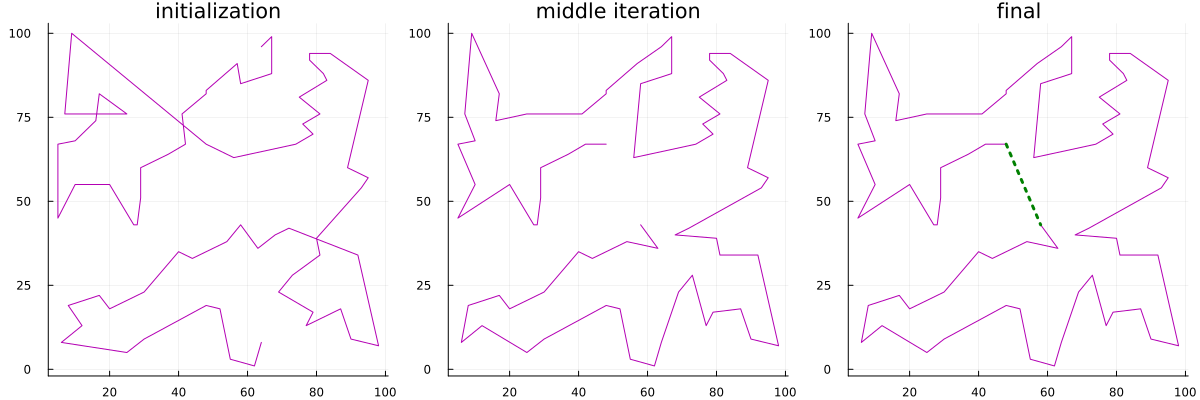

In [10]:
### run parameters setup
problem_i = 1

G = graphs[problem_i]
pop_size = 1
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(EO.TSP_NN_initialization, dimension, pop_size, objective_function, G)
selection           = EO.s_identity
crossover           = identity
mutation            = enclose_arguments(EO.order_switch!, G)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 100000)    # maximal number of objective function calls
### run parameters setup

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution, vertices[problem_i])

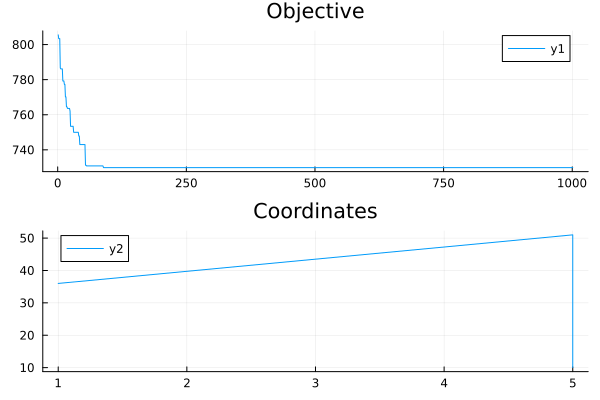

In [11]:
EO.plot_results(solution)

NN initialization for large instance

solution.top_value = 87468.56910165187


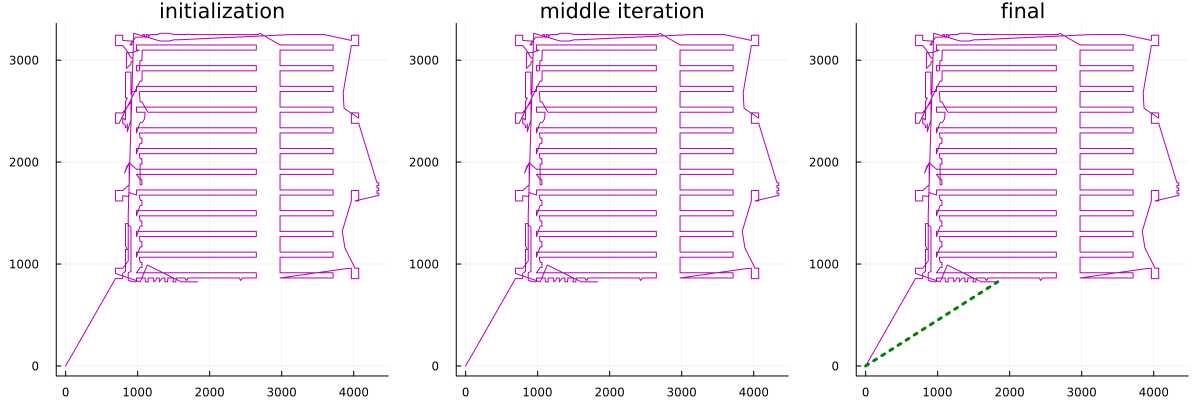

In [12]:
### run parameters setup
G, v   = EO.parse_TSP_problem("ALL_tsp/d2103");

problem_i = 1

pop_size = 1
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(EO.TSP_NN_initialization, dimension, pop_size, objective_function, G)
selection           = EO.s_identity
crossover           = identity
mutation            = enclose_arguments(EO.order_switch!, G)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 1000)    # maximal number of objective function calls
### run parameters setup

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution, v)

Listed work:
* ES with nearest neighbor initialization
* LS with nearest neighbor initialization

## 5. Memetic algorithm

Here is a comparison of performances of two basic memetic algorithms. First one finds initial solution with the use of LS and then optimizes it using ES. The second algorithm finds the initial solution with ES and finishes the optimization with local search.

Start wih LS and winish with ES

In [3]:
### setup initial LS
problem_i = 2

G = graphs[problem_i]
pop_size = 1
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(EO.TSP_initialization, dimension, pop_size, objective_function)
selection           = EO.s_identity
crossover           = identity
mutation            = enclose_arguments(EO.order_switch!, G)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 2000)    # maximal number of objective function calls

### find initial solution with LS
solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

### change to ES
pop_size = 100
initialization      = enclose_noargs(EO.copy_initialization, dimension, pop_size, objective_function, solution.top_coords) # create population from the BSF solution
selection           = enclose_arguments(s_tournament, pop_size*3, round(Int, pop_size/3))
crossover           = EO.cr_subtour
termination         = enclose_argument(iteration_termination, 500)    # maximal number of objective function calls

### finish the search with ES
solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution, vertices[problem_i])

solution.top_value = 3033.142633405736


Start wih ES and winish with LS

In [4]:
### run parameters setup
problem_i = 2

G = graphs[problem_i]
pop_size = 100
dimension = size(G, 1)

objective_function  = enclose_arguments(EO.f_dist_sum, G)
initialization      = enclose_noargs(TSP_initialization, dimension, pop_size, objective_function)
selection           = enclose_arguments(s_tournament, pop_size*3, round(Int, pop_size/3))
crossover           = EO.cr_subtour
mutation            = enclose_arguments(EO.order_switch!, G)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 500)
### run parameters setup

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

### run parameters setup

pop_size = 1

initialization      = enclose_noargs(EO.copy_initialization, dimension, pop_size, objective_function, solution.top_coords)
selection           = EO.s_identity
crossover           = identity
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 2000)    # maximal number of objective function calls
### run parameters setup

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution, vertices[problem_i])

solution.top_value = 13317.566425205765


It is visually very clear on all instances tested that, first initializing the problem with LS and then finishing it with ES works better than the other way around (given fixed number of iterations for ES and LS, 500 and 2000 respectively).

Listed work:
* Initialization by LS, finished by ES
* Initialization by ES, finished by LS

## 6. Benchmarking results

Local search algorithms with all three mutation types were benchmarked on 10 instances of the TSP problem in 10 runs. Each algorithm had a limit of 100000 calls of the objective function.

The same was done for evolution strategies, with all three implemented crossovers. All the evolution strategies used the most successful mutation from the LS runs (subsequence reverse).

### 6.1 The average performance of LS on a given TSP problem

In this subsection local search algorithms benchmark results are shown. 

A local search algorithm for each of the three implemented mutations (subseq reverse, city swap, subseq shuffle) was bencharked on ten TSP instances.
The graph shows an average performance over ten runs on a given problem.

The subseq reverse mutation chooses a subsequence of the route and switches its order. The city swap mutation picks two vertices of the route and swaps them for each other. The subseq shuffle mutation selects a subsequence of the route and randomly changes its order.


We can see that the subseq reverse mutation is drastically outperforming the two other mutations. The worst performance is seen from the subseq shuffle mutation. Based on the graph subseq shuffle mutation behaves very similar to a normal random search (rapid improvement in the beginning and then almost no improvement afterwards).

length of shortest found sequence: 3203.257333931776


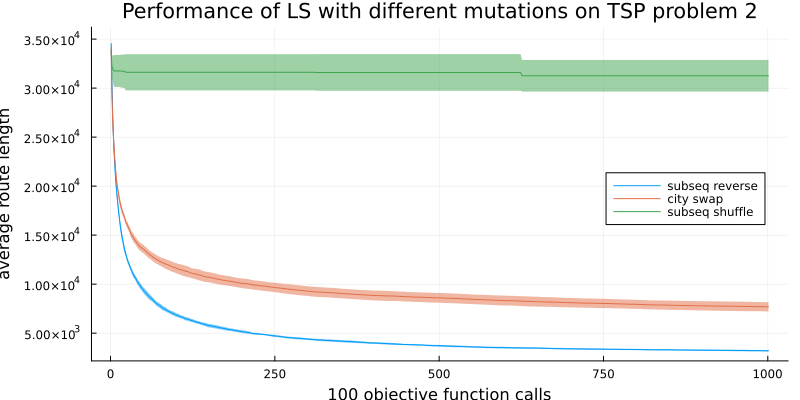

In [15]:
graph_i = 2    # chose any from 1 to 10, corresponds to the list of TSP problems in the introduction
names = ["subseq reverse", "city swap", "subseq shuffle"]

v1, s1, av1, st1 = plot_TSP_benchmark("benchmarks/LS_m"*string(1), 10, 10)
v2, s2, av2, st2 = plot_TSP_benchmark("benchmarks/LS_m"*string(2), 10, 10)
v3, s3, av3, st3 = plot_TSP_benchmark("benchmarks/LS_m"*string(3), 10, 10)

println("length of shortest found sequence: ", min(v1[graph_i]..., v2[graph_i]..., v3[graph_i]...))
p = plot(v1[graph_i], ribbon=s1[graph_i],size=(800, 400), legend=:right, labels=names[1], title="Performance of LS with different mutations on TSP problem "*string(graph_i))
p = plot!(p, v2[graph_i], labels=names[2], ribbon=s2[graph_i],xlabel="100 objective function calls")
p = plot!(p, v3[graph_i], labels=names[3], ribbon=s3[graph_i], ylabel="average route length")

The average LS performance over all chosen TSP problems:

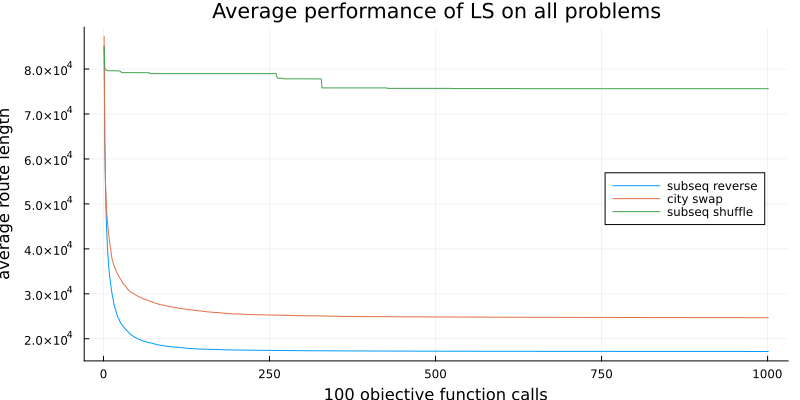

In [16]:
p = plot(av1, size=(800, 400), legend=:right, labels=names[1], title="Average performance of LS on all problems")
p = plot!(p, av2, labels=names[2], xlabel="100 objective function calls")
p = plot!(p, av3, labels=names[3], ylabel="average route length")

### 6.2 The average performance of ES on a given TSP problem

In this subsection results of benchmarks of implemented evolution strategies are displayed. 

An evolution strategy for each of the three implemented crossovers (ordered crossover, subtour order exchange, edge recombination) was benchmarked on ten chosen TSP instances.
The graph shows an average performance over ten runs on a given problem.

The ordered crossover initializes the children with a subsequence from one parent and then fills the rest of the children with vertices from the other parent, maintaining their order. With the edge recombination crossover, the children does not inherit the vertices from the parents, but instead the edges. The detailed describtion of these two crossovers can be found here: https://cw.fel.cvut.cz/wiki/_media/courses/a0m33eoa/du/puljic2013crossoversforvrp.pdf. The subtour exchange crossover is my own creation, which stems from a misstake when attempting to implement subtour exchange crossover from https://mat.uab.cat/~alseda/MasterOpt/GeneticOperations.pdf. It behaves very similar to ordered crossover, but creates two children from two parents. Both children are initialized as copies of one parent. A subsequence of one children is then chosen and the order of these vertices is exchaged for the order in which the other children has them.

Surprisingly the edge recombination crossover performs the worst, whereas the subtour order exchange crossover performs the best even though it is a product of a misstake.

length of shortest found sequence: 3784.244221512028


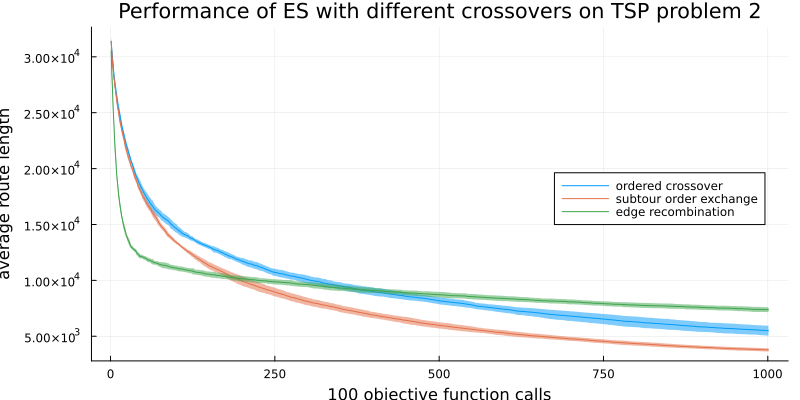

In [17]:
graph_i = 2
names = ["ordered crossover", "subtour order exchange", "edge recombination"]

v1, s1, av1, st1 = plot_TSP_benchmark("benchmarks/ES_c"*string(1), 10, 10)
v2, s2, av2, st2 = plot_TSP_benchmark("benchmarks/ES_c"*string(2), 10, 10)
v3, s3, av3, st3 = plot_TSP_benchmark("benchmarks/ES_c"*string(3), 10, 10)

println("length of shortest found sequence: ", min(v1[graph_i]..., v2[graph_i]..., v3[graph_i]...))
p = plot(v1[graph_i], ribbon=s1[graph_i], size=(800, 400), legend=:right, labels=names[1], title="Performance of ES with different crossovers on TSP problem "*string(graph_i))
p = plot!(p, v2[graph_i], labels=names[2], ribbon=s2[graph_i], xlabel="100 objective function calls")
p = plot!(p, v3[graph_i], labels=names[3], ribbon=s3[graph_i], ylabel="average route length")

The average ES performance over all chosen TSP problems:

The plot displays the average performance of an ES with given crossover over all ten chosen TSP problems.

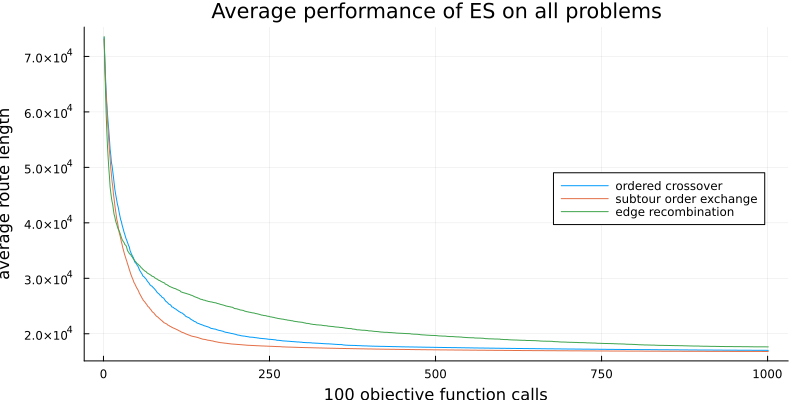

In [18]:
p = plot(av1, size=(800, 400), legend=:right, labels=names[1], title="Average performance of ES on all problems")
p = plot!(p, av2, labels=names[2], xlabel="100 objective function calls")
p = plot!(p, av3, labels=names[3], ylabel="average route length")

## 7. conclusions 

LS performs well, especially on small instances. My configurations of ESs reached similar results, but in longer time. Their perfrmance is very depending on choice of crossover and efficiency of the crossover implementation.
The memetic algorithms were really good especially when the initial solution was found by the LS.
constructive heuristic returns good solution, but the contribution of ES ans LS on its final form is negligible, because it causes the whole population to start in a local optimum making it hard to move anywhere.

## List of work

* implemented basic LS
* implemented basic ES
* implemented three crossovers: ordered crossover, subtour order exchange, edge recombination
* implemented three mutations: subseq reverse, city swap, subseq shuffle
* implemented basic initialization and NN initialization
* implemented memetic algorithm LS -> ES
* implemented memetic algorithm ES -> LS
* tested LS with three mutations on 10 instances
* tested ES with three crossovers on 10 instances
* implemented visualization of the route over the course of the optimmalization
* implemented visualization of the cost  over the course of the optimmalization
* implemented the visualization of an average performance over several runs